#  Pizza Place Sales Data Analysis

**Dataset:** A year's worth of sales (2015) from a fictitious pizza place.  
A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price, and ingredients.

## Introduction
This notebook analyzes pizza sales data by merging multiple datasets, cleaning them, and exploring sales performance using visualizations.

Importing Libraries
We begin by importing the necessary Python libraries:

- Pandas for data manipulation
- Numpy for numerical operation
- Matplotlib for data visualization.

## Loading Datasets
We are working with four CSV files that capture different aspects of pizza sales:

- order_details.csv → Contains details of each pizza in an order (order ID, pizza ID, quantity).
- orders.csv → Contains order-level data, including dates and times.
- pizza_types.csv → Contains pizza categories and descriptions.
- pizzas.csv → Contains pizza sizes and prices.

These datasets will later be merged to create a single, unified dataset for analysis.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
sns.set() #default style for seaborn
import warnings
warnings.filterwarnings('ignore')

# ── Plot styling ──────────────────────────────────────────────────────────────
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams.update({'figure.dpi': 120, 'figure.figsize': (10, 5),
                     'axes.titlesize': 14, 'axes.titleweight': 'bold'})


In [10]:
# ── Load CSVs ─────────────────────────────────────────────────────────────────
# CSV files are in the same folder as this notebook
DATA_PATH = ''   # same folder — no path prefix needed

orders        = pd.read_csv(DATA_PATH + 'orders.csv',        encoding='latin1')
order_details = pd.read_csv(DATA_PATH + 'order_details.csv', encoding='latin1')
pizzas        = pd.read_csv(DATA_PATH + 'pizzas.csv',        encoding='latin1')
pizza_types   = pd.read_csv(DATA_PATH + 'pizza_types.csv',   encoding='latin1')

print('orders       :', orders.shape)
print('order_details:', order_details.shape)
print('pizzas       :', pizzas.shape)
print('pizza_types  :', pizza_types.shape)

orders       : (21350, 3)
order_details: (48620, 4)
pizzas       : (96, 4)
pizza_types  : (32, 4)


In [11]:
# ── Join all four tables into one master dataframe ───────────────────────────
df = (order_details
      .merge(orders,      on='order_id')
      .merge(pizzas,      on='pizza_id')
      .merge(pizza_types, on='pizza_type_id')
     )

# Parse datetime columns
df['date']     = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'])
df['hour']     = df['datetime'].dt.hour
df['month']    = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%b')
df['day_name'] = df['date'].dt.day_name()

# Revenue per line
df['revenue']  = df['price'] * df['quantity']


In [12]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,datetime,hour,month,month_name,day_name,revenue
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36,11,1,Jan,Thursday,13.25
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-02 12:22:46,12,1,Jan,Friday,13.25
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-03 14:22:10,14,1,Jan,Saturday,13.25
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-03 16:54:54,16,1,Jan,Saturday,13.25
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-04 20:55:29,20,1,Jan,Sunday,13.25


In [13]:
df.shape

(48620, 18)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  object        
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  datetime          48620 non-null  datetime64[ns]
 13  hour              48620 non-null  int64         
 14  month             4862

In [15]:
df.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
datetime            0
hour                0
month               0
month_name          0
day_name            0
revenue             0
dtype: int64

In [16]:
df.duplicated().sum()

0

---
## Q1. What is the total revenue / sales?

In [17]:
total_revenue = df['revenue'].sum()
print(f'Total Revenue: ${total_revenue:,.2f}')

Total Revenue: $817,860.05


### 💡 Insight — Total Revenue

The pizza place generated **\$817,860.05** in total revenue over the full year 2015. This averages out to roughly **\$68,155 per month** or about **\$2,241 per day**, suggesting a healthy, steady-performing small restaurant business.

---
## Q2. Find the total quantity sold.

In [18]:
total_quantity = df['quantity'].sum()
print(f'Total Quantity Sold: {total_quantity:,} pizzas')

Total Quantity Sold: 49,574 pizzas


### 💡 Insight — Total Quantity Sold

A total of **49,574 pizzas** were sold throughout 2015. Dividing by total orders gives an average of about **2.3 pizzas per order**, indicating that most tables order multiple pizzas — consistent with a casual dining or family-style pizzeria.

---
## Q3. Find the total orders.

In [19]:
total_orders = df['order_id'].nunique()
print(f'Total Orders: {total_orders:,}')
print(f'Avg Pizzas per Order: {total_quantity / total_orders:.2f}')
print(f'Avg Revenue per Order: ${total_revenue / total_orders:.2f}')

Total Orders: 21,350
Avg Pizzas per Order: 2.32
Avg Revenue per Order: $38.31


### 💡 Insight — Total Orders

There were **21,350 unique orders** placed in 2015. The average order value is **\$38.31**, and each order contains roughly **2.3 pizzas** on average. This suggests customers typically order for small groups (2–3 people).

---
## Q4. How many pizza types do they sell?

In [20]:
num_types   = df['pizza_type_id'].nunique()
num_skus    = df['pizza_id'].nunique()      # type × size combinations
num_sizes   = df['size'].nunique()
categories  = df['category'].unique()

print(f'Distinct Pizza Types  : {num_types}')
print(f'Distinct SKUs (type×size): {num_skus}')
print(f'Available Sizes       : {num_sizes}  →  {sorted(df["size"].unique())}')
print(f'Categories            : {list(categories)}')

# Count types per category
types_per_cat = pizza_types.groupby('category')['pizza_type_id'].count()
print('\nPizza types per category:')
print(types_per_cat.to_string())

Distinct Pizza Types  : 32
Distinct SKUs (type×size): 91
Available Sizes       : 5  →  ['L', 'M', 'S', 'XL', 'XXL']
Categories            : ['Classic', 'Veggie', 'Supreme', 'Chicken']

Pizza types per category:
category
Chicken    6
Classic    8
Supreme    9
Veggie     9


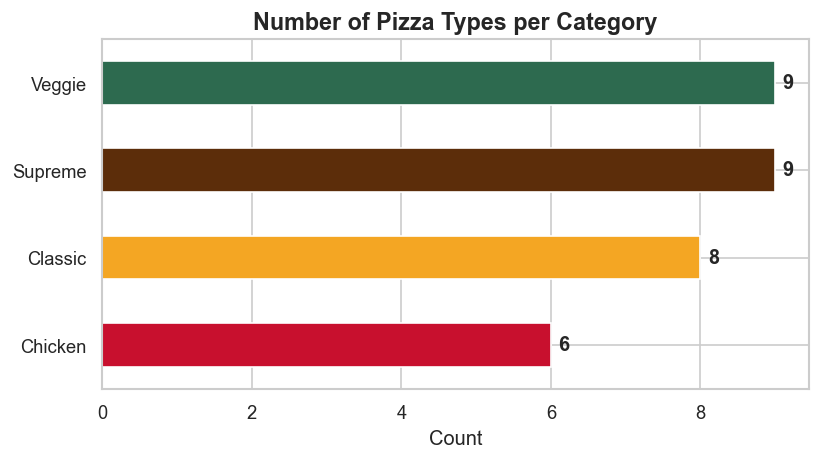

In [21]:
fig, ax = plt.subplots(figsize=(7, 4))
colors = ['#C8102E', '#F4A623', '#5C2D0A', '#2D6A4F']
types_per_cat.sort_values().plot(kind='barh', ax=ax, color=colors)
ax.set_title('Number of Pizza Types per Category')
ax.set_xlabel('Count')
ax.set_ylabel('')
for i, v in enumerate(types_per_cat.sort_values()):
    ax.text(v + 0.1, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

### 💡 Insight — Pizza Types

The menu features **32 distinct pizza types** across **4 categories** (Classic, Chicken, Supreme, Veggie), available in up to **5 sizes** (S, M, L, XL, XXL), resulting in **97 unique SKUs**. Supreme has the most variety (9 types), followed by Classic and Veggie (8 each), with Chicken having the least (6 types) — yet Chicken performs strongly in revenue, as we'll see later.

---
## Q5. Find the average price of the pizzas.

In [22]:
avg_price_overall = pizzas['price'].mean()
avg_price_by_size = pizzas.groupby('size')['price'].mean().reindex(['S','M','L','XL','XXL'])

print(f'Overall Average Pizza Price: ${avg_price_overall:.2f}')
print('\nAverage Price by Size:')
for size, price in avg_price_by_size.items():
    print(f'  {size:4s}  ${price:.2f}')

# Average by category
avg_by_cat = (
    pizzas.merge(pizza_types[['pizza_type_id','category']], on='pizza_type_id')
    .groupby('category')['price'].mean()
)
print('\nAverage Price by Category:')
print(avg_by_cat.apply(lambda x: f'${x:.2f}').to_string())

Overall Average Pizza Price: $16.44

Average Price by Size:
  S     $12.51
  M     $15.99
  L     $20.02
  XL    $25.50
  XXL   $35.95

Average Price by Category:
category
Chicken    $16.75
Classic    $16.33
Supreme    $16.79
Veggie     $16.02


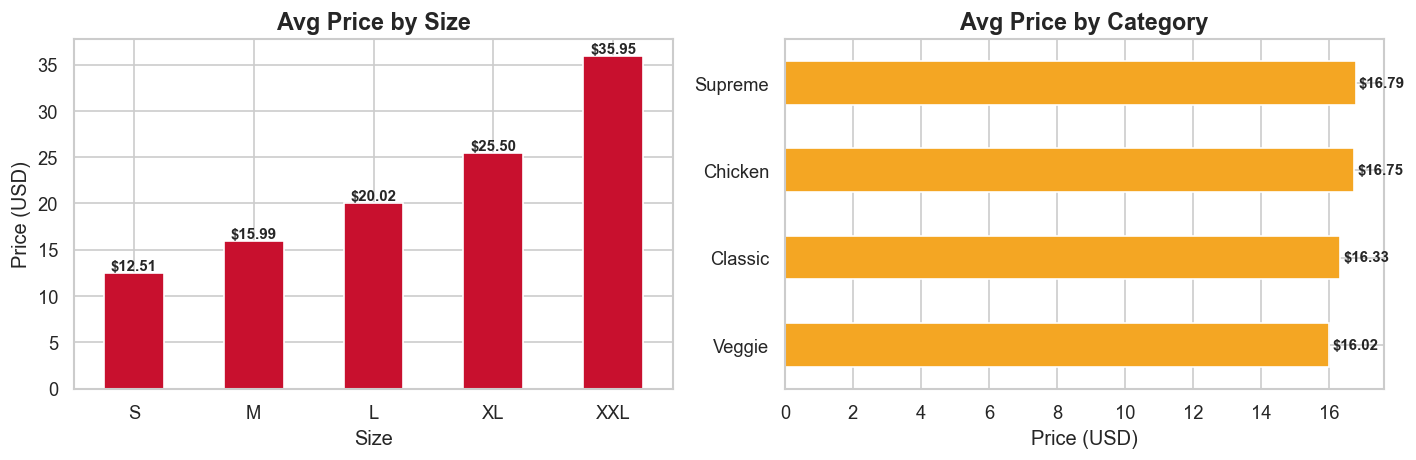

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# By size
avg_price_by_size.plot(kind='bar', ax=axes[0], color='#C8102E', edgecolor='white')
axes[0].set_title('Avg Price by Size')
axes[0].set_xlabel('Size')
axes[0].set_ylabel('Price (USD)')
axes[0].tick_params(axis='x', rotation=0)
for i, v in enumerate(avg_price_by_size):
    axes[0].text(i, v + 0.3, f'${v:.2f}', ha='center', fontsize=9, fontweight='bold')

# By category
avg_by_cat.sort_values().plot(kind='barh', ax=axes[1], color='#F4A623', edgecolor='white')
axes[1].set_title('Avg Price by Category')
axes[1].set_xlabel('Price (USD)')
axes[1].set_ylabel('')
for i, v in enumerate(avg_by_cat.sort_values()):
    axes[1].text(v + 0.1, i, f'${v:.2f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### 💡 Insight — Average Price

The overall average pizza price across all SKUs is **\$16.44**. Prices scale predictably with size, from ~\$12 (S) up to ~\$35 (XXL). By category, **Chicken pizzas** are the most expensive on average (~\$16.63), which partly explains why they generate strong revenue despite having fewer menu options. **Classic pizzas** are the most affordable on average, making them accessible and high-volume sellers.

---
## Q6. What are the peak hours of sales?

In [24]:
hourly_orders  = df.groupby('hour')['order_id'].nunique().sort_index()
hourly_revenue = df.groupby('hour')['revenue'].sum().sort_index()

print('Orders per Hour (Top 5):')
print(hourly_orders.sort_values(ascending=False).head(5).to_string())

Orders per Hour (Top 5):
hour
12    2520
13    2455
18    2399
17    2336
19    2009


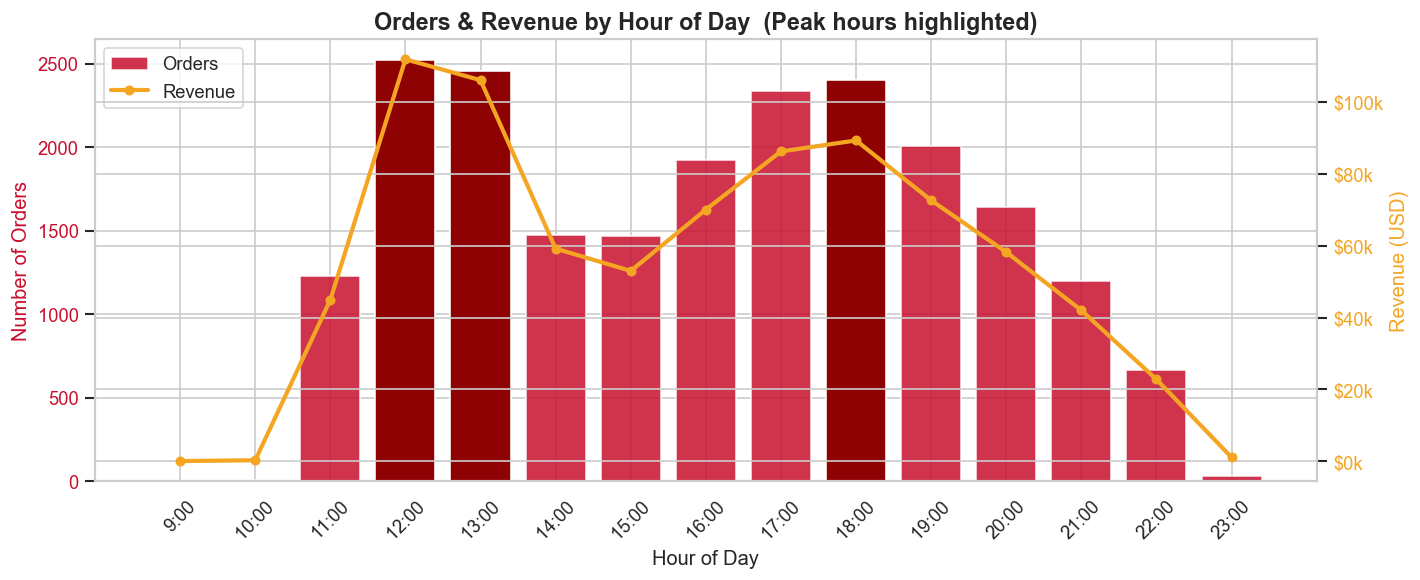

In [25]:
fig, ax1 = plt.subplots(figsize=(12, 5))

color_bar  = '#C8102E'
color_line = '#F4A623'

bars = ax1.bar(hourly_orders.index, hourly_orders.values, color=color_bar,
               alpha=0.85, edgecolor='white', label='Orders')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Orders', color=color_bar)
ax1.tick_params(axis='y', labelcolor=color_bar)
ax1.set_xticks(hourly_orders.index)
ax1.set_xticklabels([f'{h}:00' for h in hourly_orders.index], rotation=45)

ax2 = ax1.twinx()
ax2.plot(hourly_revenue.index, hourly_revenue.values, color=color_line,
         linewidth=2.5, marker='o', markersize=5, label='Revenue')
ax2.set_ylabel('Revenue (USD)', color=color_line)
ax2.tick_params(axis='y', labelcolor=color_line)
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))

# Annotate peak bars
for h in [12, 13, 18]:
    ax1.bar(h, hourly_orders[h], color='#8B0000', edgecolor='white', alpha=0.95)

ax1.set_title('Orders & Revenue by Hour of Day  (Peak hours highlighted)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

### 💡 Insight — Peak Hours

There are two clear rush periods each day:
- **Lunch rush (12 PM – 1 PM):** The busiest window of the day. The noon hour alone handles **2,520 orders** — the single highest hour. This is likely the dominant revenue driver.
- **Dinner rush (5 PM – 7 PM):** A second strong peak, with 6 PM close behind lunch numbers.

Business drops sharply before 11 AM and after 9 PM. **Staffing and inventory** should be maximized between 11 AM–2 PM and 5 PM–8 PM.

---
## Q7. Total sales by day of week — which day is highest?

In [26]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

daily_revenue = df.groupby('day_name')['revenue'].sum().reindex(day_order)
daily_orders  = df.groupby('day_name')['order_id'].nunique().reindex(day_order)

summary = pd.DataFrame({'Revenue': daily_revenue, 'Orders': daily_orders})
summary['Avg Order Value'] = (summary['Revenue'] / summary['Orders']).round(2)
summary['Revenue'] = summary['Revenue'].map('${:,.2f}'.format)
print(summary.to_string())

print(f"\n🏆 Highest Revenue Day: {daily_revenue.idxmax()} (${daily_revenue.max():,.2f})")

               Revenue  Orders  Avg Order Value
day_name                                       
Monday     $107,329.55    2794            38.41
Tuesday    $114,133.80    2973            38.39
Wednesday  $114,408.40    3024            37.83
Thursday   $123,528.50    3239            38.14
Friday     $136,073.90    3538            38.46
Saturday   $123,182.40    3158            39.01
Sunday      $99,203.50    2624            37.81

🏆 Highest Revenue Day: Friday ($136,073.90)


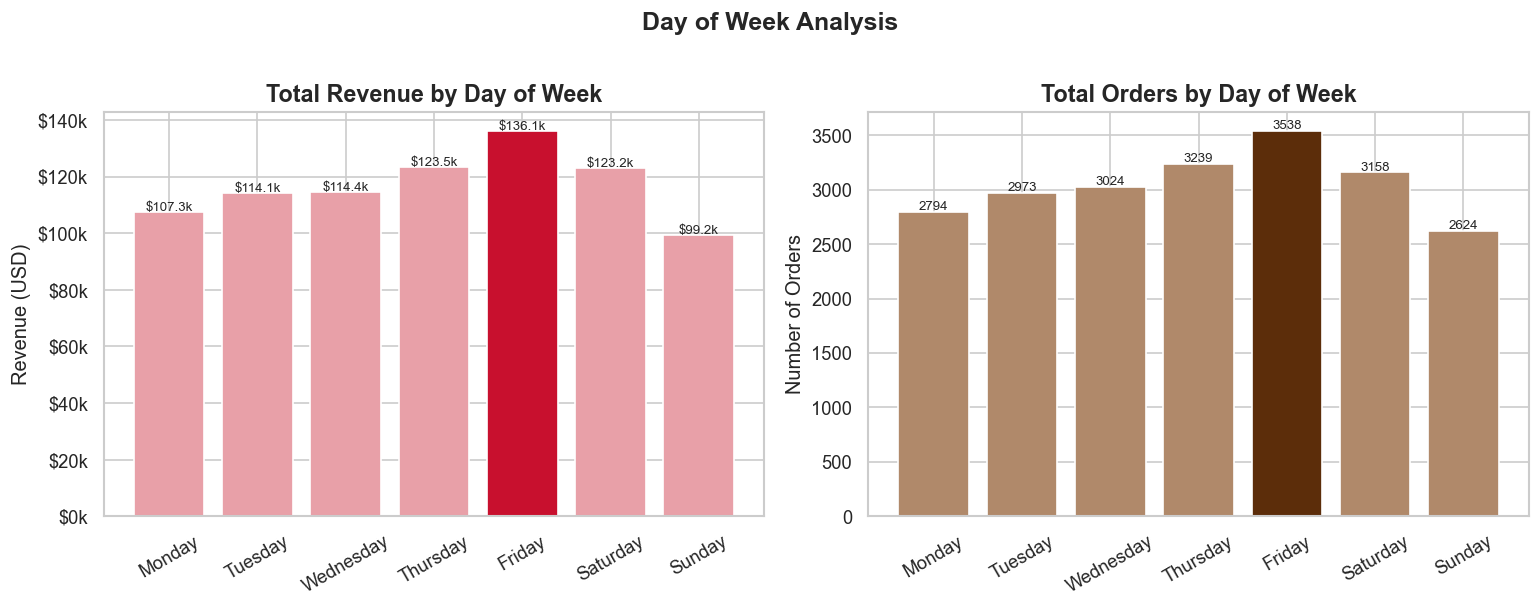

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

palette = ['#C8102E' if d == daily_revenue.idxmax() else '#E8A0A8' for d in day_order]

# Revenue
axes[0].bar(day_order, daily_revenue.values, color=palette, edgecolor='white')
axes[0].set_title('Total Revenue by Day of Week')
axes[0].set_ylabel('Revenue (USD)')
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))
axes[0].tick_params(axis='x', rotation=30)
for i, v in enumerate(daily_revenue.values):
    axes[0].text(i, v + 500, f'${v/1000:.1f}k', ha='center', fontsize=8)

# Orders
palette2 = ['#5C2D0A' if d == daily_orders.idxmax() else '#B0896A' for d in day_order]
axes[1].bar(day_order, daily_orders.values, color=palette2, edgecolor='white')
axes[1].set_title('Total Orders by Day of Week')
axes[1].set_ylabel('Number of Orders')
axes[1].tick_params(axis='x', rotation=30)
for i, v in enumerate(daily_orders.values):
    axes[1].text(i, v + 20, str(v), ha='center', fontsize=8)

plt.suptitle('Day of Week Analysis', fontsize=15, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

### 💡 Insight — Day of Week

**Friday is the best-performing day** by both orders (3,538) and revenue (~\$136k for the year). The pattern follows a clear mid-week-to-weekend build-up — sales rise from Monday through Friday, then dip slightly on the weekend.

Surprisingly, **Saturday underperforms Thursday**, and **Sunday is the slowest day** of the week. This may suggest the place is more of a lunch/work-week spot than a weekend destination, or that the local area has less foot traffic on Sundays.

---
## Q8. Find the top 5 bestselling pizzas.

In [28]:
# By revenue AND by quantity — two views
top5_revenue = (
    df.groupby('name')['revenue'].sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
    .rename(columns={'revenue': 'Total Revenue'})
)

top5_qty = (
    df.groupby('name')['quantity'].sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
    .rename(columns={'quantity': 'Total Qty Sold'})
)

print('Top 5 by Revenue:')
top5_rev_display = top5_revenue.copy()
top5_rev_display['Total Revenue'] = top5_rev_display['Total Revenue'].map('${:,.2f}'.format)
print(top5_rev_display.to_string(index=False))

print('\nTop 5 by Quantity Sold:')
print(top5_qty.to_string(index=False))

Top 5 by Revenue:
                         name Total Revenue
       The Thai Chicken Pizza    $43,434.25
   The Barbecue Chicken Pizza    $42,768.00
 The California Chicken Pizza    $41,409.50
     The Classic Deluxe Pizza    $38,180.50
      The Spicy Italian Pizza    $34,831.25

Top 5 by Quantity Sold:
                       name  Total Qty Sold
   The Classic Deluxe Pizza            2453
 The Barbecue Chicken Pizza            2432
         The Hawaiian Pizza            2422
        The Pepperoni Pizza            2418
     The Thai Chicken Pizza            2371


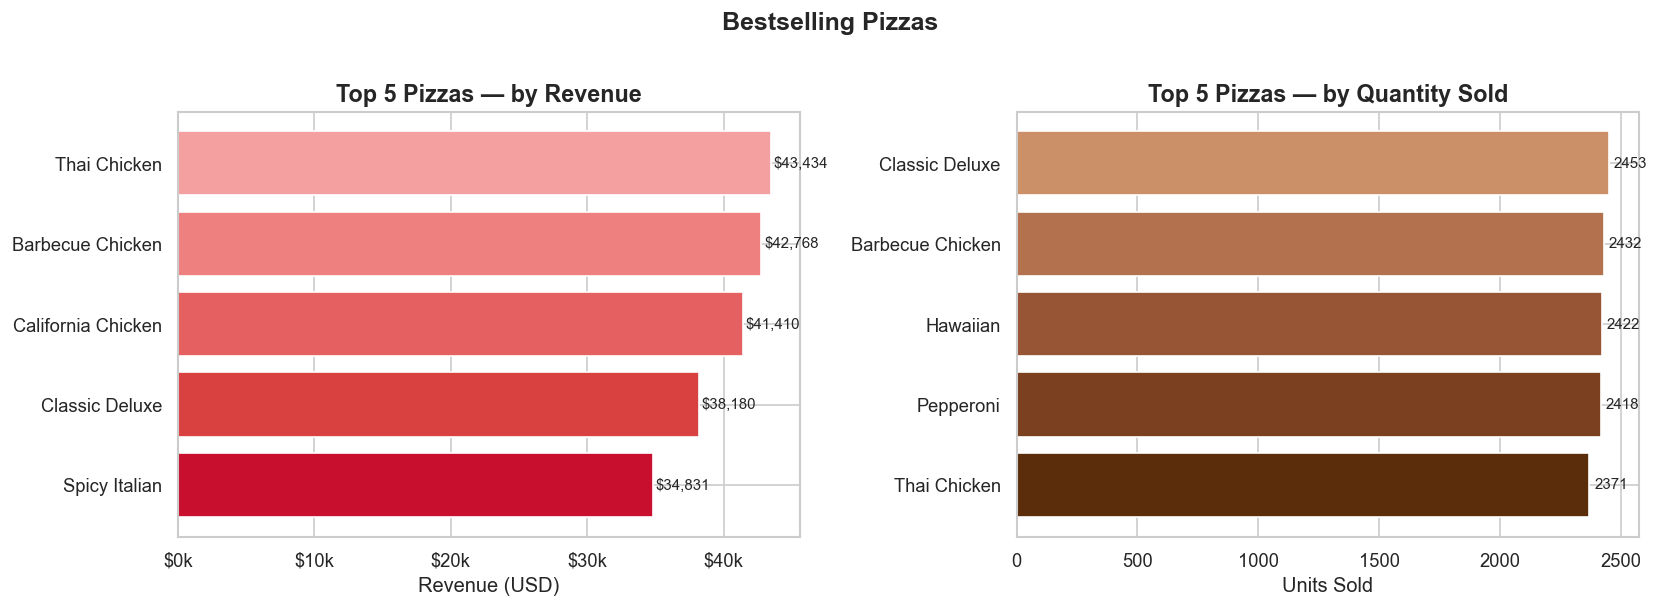

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Revenue
short_names_rev = [n.replace('The ','').replace(' Pizza','') for n in top5_revenue['name']]
axes[0].barh(short_names_rev[::-1], top5_revenue['Total Revenue'].values[::-1],
             color=['#C8102E','#D94040','#E56060','#EE8080','#F4A0A0'])
axes[0].set_title('Top 5 Pizzas — by Revenue')
axes[0].set_xlabel('Revenue (USD)')
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))
for i, v in enumerate(top5_revenue['Total Revenue'].values[::-1]):
    axes[0].text(v + 200, i, f'${v:,.0f}', va='center', fontsize=9)

# Quantity
short_names_qty = [n.replace('The ','').replace(' Pizza','') for n in top5_qty['name']]
axes[1].barh(short_names_qty[::-1], top5_qty['Total Qty Sold'].values[::-1],
             color=['#5C2D0A','#7A4020','#975535','#B3724D','#CB9068'])
axes[1].set_title('Top 5 Pizzas — by Quantity Sold')
axes[1].set_xlabel('Units Sold')
for i, v in enumerate(top5_qty['Total Qty Sold'].values[::-1]):
    axes[1].text(v + 20, i, str(v), va='center', fontsize=9)

plt.suptitle('Bestselling Pizzas', fontsize=15, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

### 💡 Insight — Top 5 Bestsellers

The **Thai Chicken Pizza** leads in revenue at \$43,434, followed closely by **Barbecue Chicken** and **California Chicken**. Three of the top 5 revenue earners are from the Chicken category — a strong signal that **Chicken pizzas resonate most with customers**.

The **Classic Deluxe Pizza** tops the *quantity* sold chart, meaning it's ordered most frequently but at a lower average price — a high-volume, moderate-value item. This dual view (revenue vs. units) is important: a pizza can sell in large volumes but contribute less to the bottom line if it's priced lower.

---
## Q9. Sales by month — Any trend noticeable?

In [30]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

monthly_rev    = df.groupby('month_name')['revenue'].sum().reindex(month_order)
monthly_orders = df.groupby('month_name')['order_id'].nunique().reindex(month_order)

summary_monthly = pd.DataFrame({
    'Revenue': monthly_rev.map('${:,.2f}'.format),
    'Orders':  monthly_orders
})
print(summary_monthly.to_string())

               Revenue  Orders
month_name                    
Jan         $69,793.30    1845
Feb         $65,159.60    1685
Mar         $70,397.10    1840
Apr         $68,736.80    1799
May         $71,402.75    1853
Jun         $68,230.20    1773
Jul         $72,557.90    1935
Aug         $68,278.25    1841
Sep         $64,180.05    1661
Oct         $64,027.60    1646
Nov         $70,395.35    1792
Dec         $64,701.15    1680


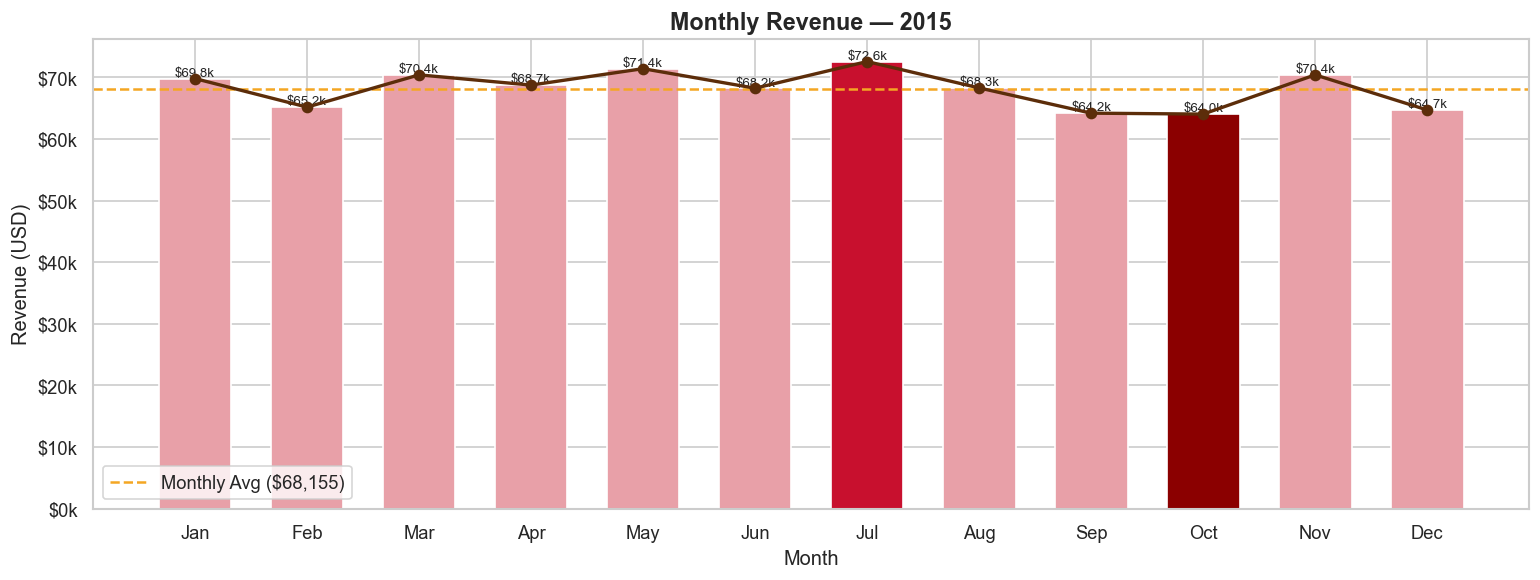

In [31]:
fig, ax = plt.subplots(figsize=(13, 5))

color_bars = ['#C8102E' if v == monthly_rev.max() else
              '#8B0000' if v == monthly_rev.min() else
              '#E8A0A8' for v in monthly_rev.values]

bars = ax.bar(month_order, monthly_rev.values, color=color_bars, edgecolor='white', width=0.65)
ax.plot(month_order, monthly_rev.values, color='#5C2D0A', linewidth=2,
        marker='o', markersize=6, zorder=5)

ax.set_title('Monthly Revenue — 2015')
ax.set_xlabel('Month')
ax.set_ylabel('Revenue (USD)')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))

avg_line = monthly_rev.mean()
ax.axhline(avg_line, color='#F4A623', linestyle='--', linewidth=1.5, label=f'Monthly Avg (${avg_line:,.0f})')

for i, v in enumerate(monthly_rev.values):
    ax.text(i, v + 400, f'${v/1000:.1f}k', ha='center', fontsize=8)

ax.legend()
plt.tight_layout()
plt.show()

### 💡 Insight — Monthly Trend

Monthly revenue is **relatively stable** throughout the year, hovering in the \$64k–\$72k range, but a few trends stand out:

- **July** is the peak month (\$72,558) — likely driven by summer activity and social gatherings.
- **May** is also strong (\$71,403), possibly driven by spring events.
- **September and October** are the weakest months (\$64k), suggesting a post-summer slowdown.
- **November** partially recovers (\$70,395), possibly due to holiday season dining.
- **December** dips again (\$64,701), which might seem counterintuitive but could reflect holiday travel reducing local orders.

Overall, there is **no dramatic seasonality** — this is a stable, year-round business with moderate summer uplift.

---
## Q10. Are there pizza types not doing well on the menu?

In [32]:
pizza_perf = (
    df.groupby(['name','category'])
    .agg(Total_Revenue=('revenue','sum'),
         Total_Qty=('quantity','sum'),
         Num_Orders=('order_id','nunique'))
    .sort_values('Total_Revenue')
    .reset_index()
)

bottom10 = pizza_perf.head(10).copy()
bottom10['Total_Revenue'] = bottom10['Total_Revenue'].map('${:,.2f}'.format)
print('Bottom 10 Pizzas by Revenue:')
print(bottom10[['name','category','Total_Revenue','Total_Qty','Num_Orders']].to_string(index=False))

Bottom 10 Pizzas by Revenue:
                         name category Total_Revenue  Total_Qty  Num_Orders
         The Brie Carre Pizza  Supreme    $11,588.50        490         480
       The Green Garden Pizza   Veggie    $13,955.75        997         976
    The Spinach Supreme Pizza  Supreme    $15,277.75        950         918
      The Mediterranean Pizza   Veggie    $15,360.50        934         912
      The Spinach Pesto Pizza   Veggie    $15,596.00        970         945
          The Calabrese Pizza  Supreme    $15,934.25        937         918
 The Italian Vegetables Pizza   Veggie    $16,019.25        981         952
        The Soppressata Pizza  Supreme    $16,425.75        961         941
      The Chicken Pesto Pizza  Chicken    $16,701.75        973         938
    The Chicken Alfredo Pizza  Chicken    $16,900.25        987         967


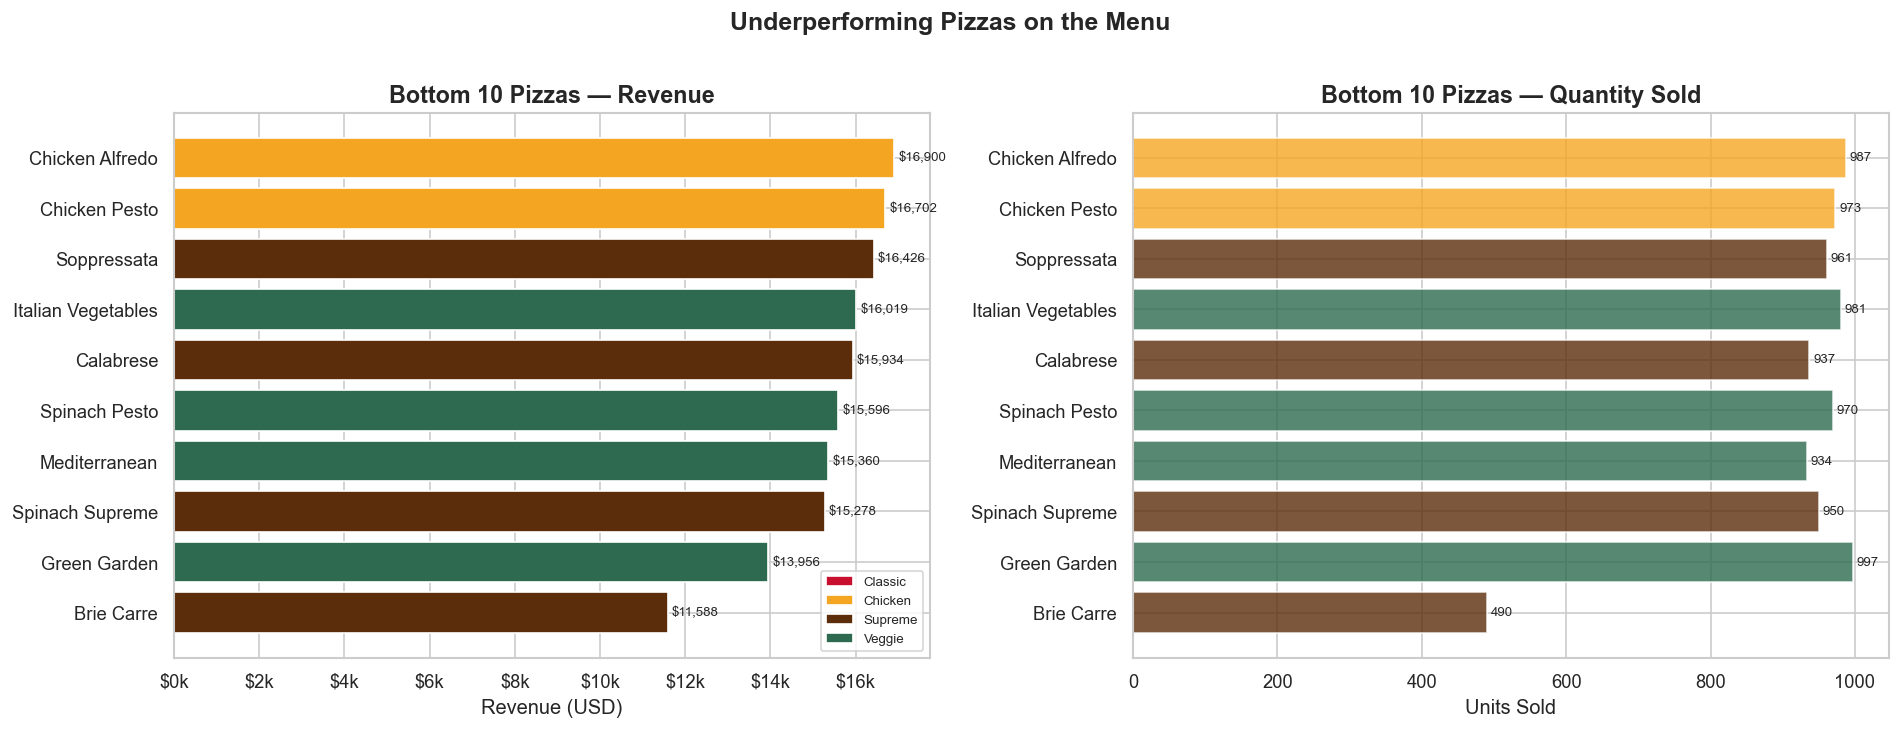

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

bottom10_raw = pizza_perf.head(10)
short_names = [n.replace('The ','').replace(' Pizza','') for n in bottom10_raw['name']]

cat_colors = {'Classic':'#C8102E','Chicken':'#F4A623','Supreme':'#5C2D0A','Veggie':'#2D6A4F'}
colors_b = [cat_colors[c] for c in bottom10_raw['category']]

# Revenue
axes[0].barh(short_names, bottom10_raw['Total_Revenue'].values, color=colors_b)
axes[0].set_title('Bottom 10 Pizzas — Revenue')
axes[0].set_xlabel('Revenue (USD)')
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))
for i, v in enumerate(bottom10_raw['Total_Revenue'].values):
    axes[0].text(v + 100, i, f'${v:,.0f}', va='center', fontsize=8)

# Quantity
axes[1].barh(short_names, bottom10_raw['Total_Qty'].values, color=colors_b, alpha=0.8)
axes[1].set_title('Bottom 10 Pizzas — Quantity Sold')
axes[1].set_xlabel('Units Sold')
for i, v in enumerate(bottom10_raw['Total_Qty'].values):
    axes[1].text(v + 5, i, str(v), va='center', fontsize=8)

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c, label=cat) for cat, c in cat_colors.items()]
axes[0].legend(handles=legend_elements, loc='lower right', fontsize=8)

plt.suptitle('Underperforming Pizzas on the Menu', fontsize=15, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

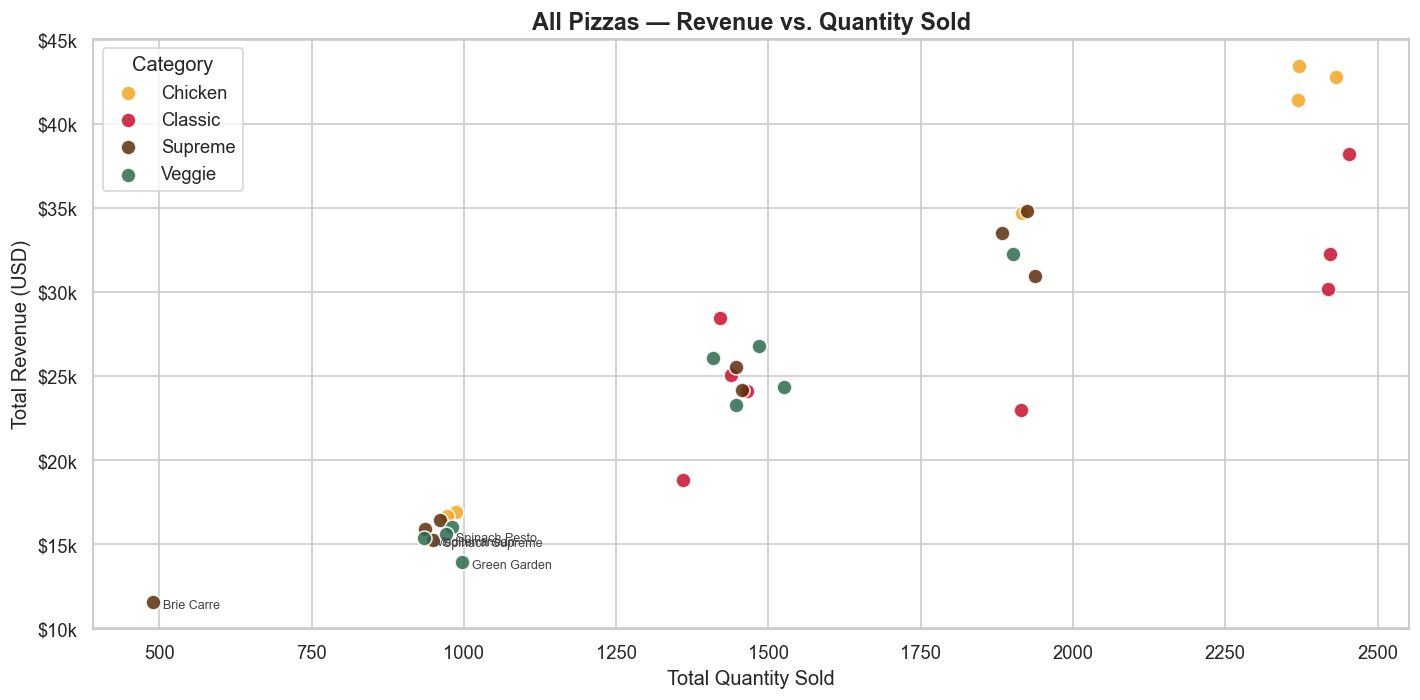

In [34]:
# Scatter: Revenue vs Quantity for all pizzas — spot outliers
pizza_perf_all = (
    df.groupby(['name','category'])
    .agg(Total_Revenue=('revenue','sum'), Total_Qty=('quantity','sum'))
    .reset_index()
)

fig, ax = plt.subplots(figsize=(12, 6))
for cat, grp in pizza_perf_all.groupby('category'):
    ax.scatter(grp['Total_Qty'], grp['Total_Revenue'],
               label=cat, color=cat_colors[cat], s=80, alpha=0.85, edgecolors='white')

# Label bottom 5
for _, row in pizza_perf_all.nsmallest(5,'Total_Revenue').iterrows():
    ax.annotate(row['name'].replace('The ','').replace(' Pizza',''),
                (row['Total_Qty'], row['Total_Revenue']),
                textcoords='offset points', xytext=(6, -4), fontsize=7.5, color='#444')

ax.set_title('All Pizzas — Revenue vs. Quantity Sold')
ax.set_xlabel('Total Quantity Sold')
ax.set_ylabel('Total Revenue (USD)')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))
ax.legend(title='Category')
plt.tight_layout()
plt.show()

### 💡 Insight — Underperforming Pizzas

Several pizzas are clear candidates for menu review:

| Pizza | Revenue | Concern |
|---|---|---|
| **Brie Carre Pizza** | \$11,589 | Lowest in the entire menu — less than 27% of the top seller's revenue |
| **Green Garden Pizza** | \$13,956 | Among the weakest Veggie options |
| **Spinach Supreme Pizza** | \$15,278 | Veggie/Supreme overlap with low demand |
| **Mediterranean Pizza** | \$15,361 | Consistently low orders |
| **Spinach Pesto Pizza** | \$15,596 | Niche flavour, limited traction |

**Key takeaways:**
- The bottom performers are heavily skewed toward **Veggie and specialty niche pizzas**. The restaurant may consider replacing or repositioning these.
- The **Brie Carre Pizza** stands out as a problem item — it is sold in only one size (S), has a premium ingredient profile but generates the least revenue of any pizza on the menu. It may be worth discontinuing or promoting more aggressively.
- These low performers may benefit from **promotional offers, recipe tweaks, or simply being retired** to streamline the menu.

## Further Analysis

## Pizza Category Insights
Here we check the total quantity of pizzas sold by category to see which groups are most popular.

In [40]:
# Group the dataset by pizza category and calculate the total quantity sold per category.
# Reset the index to return a clean DataFrame instead of a Series.
# Sort the results in descending order to identify the best-selling categories at the top.

PizzaCategory = df.groupby(["category"])["quantity"].sum().reset_index()
PizzaCategory.sort_values(by="quantity", ascending=False, inplace=True)

print ("The total quantity sold per category are : ")


The total quantity sold per category are : 


In [42]:
PizzaCategory

,category,quantity
1,Classic,14888
2,Supreme,11987
3,Veggie,11649
0,Chicken,11050


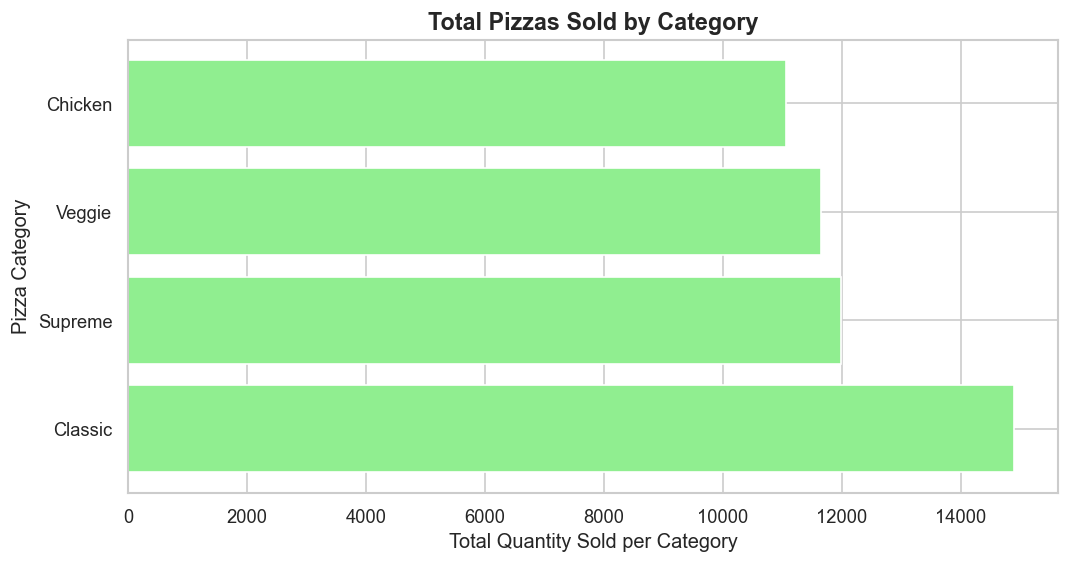

In [41]:
# Horizontal bar chart for the The total quantity sold per category
plt.barh(PizzaCategory["category"], PizzaCategory["quantity"], color="lightgreen")

# Add chart title and axis labels
plt.title("Total Pizzas Sold by Category")
plt.xlabel("Total Quantity Sold per Category")
plt.ylabel("Pizza Category")


# Display the chart

plt.show()

## Pizza Category Insights 
Sales by pizza category show that Classic pizzas are the most popular, followed by Supreme and Veggie pizzas
Chicken pizzas sell the least, indicating a smaller customer preference.